## Богатов Антон Юрьевич
### Лабораторная работа 4
### Вариант 4
### Задания 4.1.4, 4.2, 4.4.1 и 4.8.1

### Задача 4.1.4
##### Условие:

Дана система уравнений $Ax=b$. Найти решение системы с помощью метода Гаусса. Выполнить 10 итераций по методу Зейделя. Принимая решение, полученное с помощью метода Гаусса за точное, найти величину абсолютной погрешности итерационного решения.

##### Порядок решения задачи:
1. Задать матрицу системы $A$ и вектор правой части $b$.  Используя встроенную результаты выполнения лабораторной работы 3, либо стандартные библиотечные функции (функцию numpy.linalg.solve), найти решение системы $Ax=b$ с помощью метода Гаусса.
2. Преобразовать систему $Ax=b$ к виду $x=Bx+c$, удобному для итераций. Проверить выполнение достаточного условия сходимости итерационных методов $||B||_{\infty}<1$.
3. Программно реализовать метод Зейделя решения системы линейных уравнений. Предусмотреть два критерия остановки итерационного процесса: а) по максимальному числу итераций и б) по достижению заданной точности $ε$.
4. Выполнить 10 итераций по методу Зейделя; взять любое начальное приближение. Принимая решение, полученное в п. 1 за точное, найти величину абсолютной погрешности итерационного решения (использовать норму $||.||_{\infty}$).
5. Взять другое начальное приближение. Объяснить полученные результаты.

In [1]:
import numpy as np

In [12]:
# Задание А и b
A = np.matrix([[39.6, 0, 17.5, 9.9, 12], 
               [79.2, 120, 0, 39.6, 0], 
               [19.8, -21, 46, 0, 5], 
               [49.5, 19, 19, 89.1, 0], 
               [9.9, 25, 10, -39.6, 85]])
b = np.array([38.5, 38.8, 93.7, 43, -49.7])
A, b

(matrix([[ 39.6,   0. ,  17.5,   9.9,  12. ],
         [ 79.2, 120. ,   0. ,  39.6,   0. ],
         [ 19.8, -21. ,  46. ,   0. ,   5. ],
         [ 49.5,  19. ,  19. ,  89.1,   0. ],
         [  9.9,  25. ,  10. , -39.6,  85. ]]),
 array([ 38.5,  38.8,  93.7,  43. , -49.7]))

In [35]:
# Решение:
x = np.linalg.solve(A, b)
x

array([ 0.44444444,  0.1       ,  2.        , -0.21212121, -1.        ])

In [14]:
# Проверка:
np.allclose(np.dot(A, x), b)

True

In [16]:
# Преобразование к виду, удобному для итераций:
B = np.zeros(A.shape)
c = np.zeros(b.shape)
for i in range(A.shape[0]):
    c[i] = b[i] / A[i, i]
    for j in range(A.shape[1]):
        if i != j:
            B[i, j] = -A[i, j] / A[i, i]
B, c

(array([[ 0.        , -0.        , -0.44191919, -0.25      , -0.3030303 ],
        [-0.66      ,  0.        , -0.        , -0.33      , -0.        ],
        [-0.43043478,  0.45652174,  0.        , -0.        , -0.10869565],
        [-0.55555556, -0.21324355, -0.21324355,  0.        , -0.        ],
        [-0.11647059, -0.29411765, -0.11764706,  0.46588235,  0.        ]]),
 array([ 0.97222222,  0.32333333,  2.03695652,  0.48260382, -0.58470588]))

In [18]:
# Проверка выполнения достаточного условия сходимости итерационных методов:
if np.linalg.norm(B, ord=np.inf) < 1:
    print('Достаточное условие выполнено')
else:
    print('Достаточное условие не выполнено')

Достаточное условие выполнено


In [83]:
def zeid(B, c, x0, eps, iter_num):
    sol = np.zeros(c.shape)
    B1 = np.tril(B, k = 0)
    B2 = np.triu(B, k = 0)
    eps = (1 - np.linalg.norm(B, ord=np.inf)) / np.linalg.norm(B2, ord=np.inf) * eps
    err = 2 * eps
    n = 0
    while n < iter_num and err > eps:
        for i in range(B.shape[0]):
            sol[i] = np.dot(x0, B2[i]) + np.dot(sol, B1[i]) + c[i]
        err = np.linalg.norm(sol - x0, ord=np.inf)
        x0 = sol.copy()
        n += 1
    return sol, n

In [85]:
eps = 1e-5
iter_max = 10
zeid_x, iter_num = zeid(B, c, np.zeros(c.shape), eps, iter_max)
print('Решение методом Зейделя:', zeid_x)
print('Абсолютная погрешность:', np.max(np.abs(zeid_x - x)))

Решение методом Зейделя: [ 0.44453599  0.09996952  1.99995005 -0.21215492 -1.00001153]
Абсолютная погрешность: 9.154375900177758e-05


In [86]:
zeid_x, iter_num = zeid(B, c, np.ones(c.shape), eps, iter_max)
print('Решение методом Зейделя:', zeid_x)
print('Абсолютная погрешность:', np.max(np.abs(zeid_x - x)))

Решение методом Зейделя: [ 0.44441239  0.10001063  2.00001746 -0.21210939 -0.99999594]
Абсолютная погрешность: 3.2053819392863225e-05


Погрешность отличается в зависимости от начального приближения. За 10 итераций алгоритм сходится к решению с большей или меньшей точностью.

### Задача 4.2
##### Условие:

Для системы уравнений $Ax=b$ из задачи $4.1$ найти решение по методу Зейделя с точностью $\epsilon=10^{-6}$, взяв любое начальное приближение. Предусмотреть подсчет количества итераций, потребовавшихся для достижения точности $\epsilon$. 

In [87]:
eps = 1e-6
iter_max = 40
x0 = np.array([-1, 0.3, 1, -0.673, -0.2534])
zeid_x, iter_num = zeid(B, c, x0, eps, iter_max)
print('Решение методом Зейделя:', zeid_x)
print('Количество итераций:', iter_num)

Решение методом Зейделя: [ 0.44444445  0.1         2.         -0.21212121 -1.        ]
Количество итераций: 21


### Задача 4.4.1
##### Условие:

Дана система уравнений $x=Bx+c$, где $B=B(t), t = −1, 0.8, ..., 0.8, 1$ - параметр. Построить график (или гистограмму) зависимости нормы $||B||_{\infty}$ от параметра $t$. По графику определить, при каких перечисленных выше значениях $t$ выполнено достаточное условие сходимости итерационных методов. Найти решение системы $x=Bx+c$ с точностью $\epsilon=10^{-5}$ для наибольшего значения параметра $t$, при котором выполнено условие сходимости.

In [127]:
def form_B(t):
    B = np.matrix([[0.2, 0.3, -0.1],
                  [0.1, -0.25, np.cos(0.5*np.pi*t)],
                  [np.sin(10*np.pi*t), 0.1, 0.3]])
    return B

c = np.array([1, 2, 1])
t = np.arange(-1, 1.2, 0.2)

In [128]:
fig = []
t_max = -1
for tt in t:
    norm = np.linalg.norm(form_B(tt), ord=np.inf)
    fig.append(norm)
    if norm < 1 and tt > t_max:
            t_max = tt

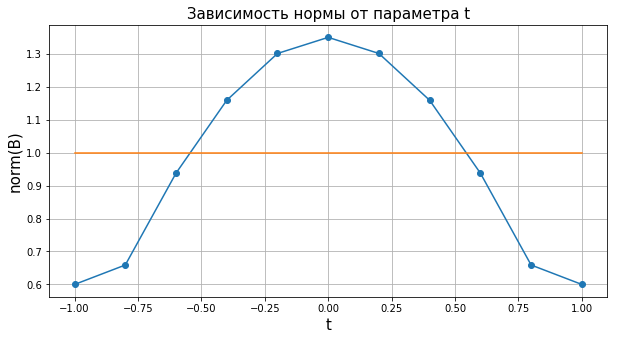

In [134]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(t, fig, 'o-')
plt.plot(t, np.ones(len(fig)))
plt.xlabel('t', size=15)
plt.ylabel('norm(B)', size=15)
plt.title('Зависимость нормы от параметра t', size=15);

Достаточное условие сходимости итерационных методов выполнено при $t\in [-1; -0.6] \cup [0.6; 1]$

In [138]:
B = form_B(t_max)
eps = 1e-5
iter_max = 40
x0 = np.array([-1, 0.3, 1])
zeid_t_max, iter_num = zeid(B, c, x0, eps, iter_max)
print('Решение методом Зейделя:', zeid_t_max)
print('Количество итераций:', iter_num)

Решение методом Зейделя: [1.91977418 1.46131825 2.8653233 ]
Количество итераций: 25


### Задача 4.8.1
##### Условие:

Дана система уравнений $Ax=b$, где $A$ – симметричная положительно определенная матрица размерности $n х n$. Найти решение системы с помощью явного и неявного нестационарных методов с чебышевским набором параметров с точностью $\epsilon=10^{-6}$. Сравнить скорость сходимости методов.

УКАЗАНИЕ. При подсчете числа итераций, достаточного для получения заданной точности $\epsilon$, для нахождения
собственных значений матрицы воспользоваться встроенной функцией numpy.linalg.eigvals.

In [156]:
eps = 1e-6
n = 50
m = 1
q_m = 1.05 + (-1)**m * m * 10**(-2)
q = np.array([q_m**(i+1) for i in range(n)])
tau = np.sum([q_m**(2*(i+1)) for i in range(n)])
t_m = m + n
b = np.array([tau + 3*q[i] for i in range(n)])
A = np.zeros([n,n])
for i in range(n):
    for j in range(n):
        if i == j:
            A[i][j] = 2 * q[i] * t_m**2
        else:
            A[i][j] = 2 * tau + (q[i] + q[j]) * t_m
B = np.diag(np.diag(A))
B_inv = np.diag(1/np.diag(B))

In [157]:
lambda_vec = np.linalg.eigvals(A)
l_max, l_min = max(lambda_vec), min(lambda_vec)
tau_0 = 2 / (l_max + l_min)
ksi = l_min / l_max
p_0 = (1 - ksi) / (1 + ksi)

In [203]:
def explicit_method(x0, b, A, eps, l_max, l_min, tau_0, ksi, p_0, max_it):
    counter = 1
    t_k = np.array([np.cos((2*k + 1) * np.pi / 2 / max_it) for k in range(max_it)])
    tau = np.array([tau_0 / (1 + p_0 * t_k[i]) for i in range(max_it)])
    x = x0
    x_next = tau[0] * (b - np.dot(A, x)) + x
    while np.linalg.norm(x_next - x, ord = np.inf) > eps and counter != max_it:
        x = x_next
        x_next = tau[counter] * (b - np.dot(A,x)) + x
        counter += 1
    if counter == max_it:
        print("Явный метод - достигнуто максимальное количество итераций.")
    else: 
        print("Явный метод - заданная точность получена за ", counter, "шагов.")
    return x_next

In [204]:
def implicit_method(x_0, b, A, B_inv, eps, max_it):
    lambda_vec = np.linalg.eigvals(np.dot(B_inv, A))
    l_max, l_min = max(lambda_vec), min(lambda_vec)
    tau_0 = 2 / (l_max + l_min)
    ksi = l_min/ l_max
    p_0 = (1 - ksi) / (1 + ksi)
    counter = 0
    t_k = np.array([np.cos((2*k + 1) * np.pi / 2 / max_it) for k in range(max_it)])
    tau = np.array([tau_0 / (1 + p_0 * t_k[i]) for i in range(max_it)])
    x = x0
    x_next = np.dot(B_inv, tau[counter] * (b - np.dot(A, x))) + x
    counter += 1
    while np.linalg.norm(x_next - x, ord = np.inf) > eps and counter != max_it:
        x = x_next
        x_next = np.dot(B_inv, tau[counter] * (b - np.dot(A, x))) + x
        counter += 1
    if counter == max_it:
        print("Неявный метод - достигнуто максимальное количество итераций.")
    else: 
        print("Неявный метод - заданная точность получена за ", counter, "шагов.")
    return x_next

In [205]:
it_num = 120
x0 = np.zeros(b.shape)
sol_explicit = explicit_method(x0, b, A, eps, l_max, l_min, tau_0, ksi, p_0, it_num)
sol_implicit = implicit_method(x0, b, A, B_inv, eps, it_num)

Явный метод - заданная точность получена за  93 шагов.
Неявный метод - заданная точность получена за  56 шагов.


In [206]:
x0 = np.ones(b.shape)
sol_explicit = explicit_method(x0, b, A, eps, l_max, l_min, tau_0, ksi, p_0, it_num)
sol_implicit = implicit_method(x0, b, A, B_inv, eps, it_num)

Явный метод - достигнуто максимальное количество итераций.
Неявный метод - заданная точность получена за  78 шагов.


In [208]:
import random
x0 = random.random() * np.ones(b.shape)
sol_explicit = explicit_method(x0, b, A, eps, l_max, l_min, tau_0, ksi, p_0, it_num)
sol_implicit = implicit_method(x0, b, A, B_inv, eps, it_num)

Явный метод - заданная точность получена за  91 шагов.
Неявный метод - заданная точность получена за  73 шагов.


Неявный метод сходится быстрее.